In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
!pip install opencv-python


(1024, 768, 3)
(800, 1500, 3)


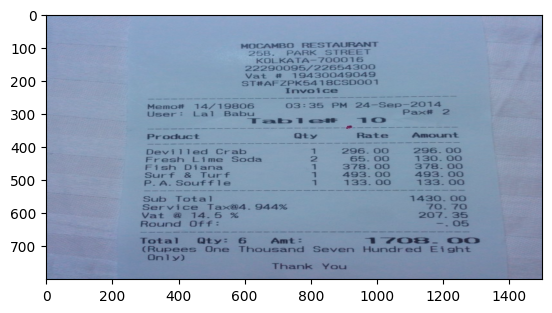

In [3]:
im_path ="./HELLO.jpg"
img = cv2.imread(im_path)
print(img.shape)
img = cv2.resize(img,(1500,800))
print(img.shape)
plt.imshow(img)
plt.show()

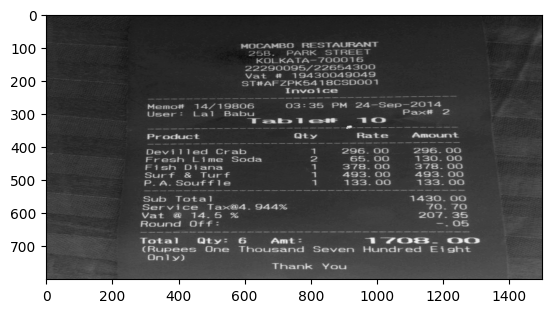

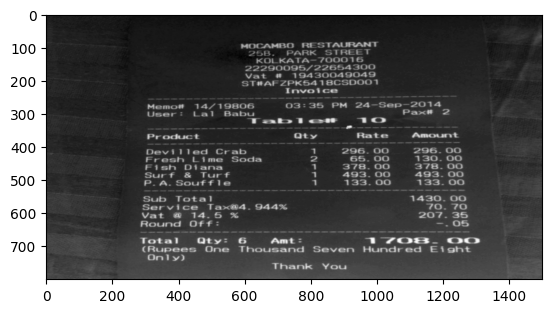

In [4]:
#Remove the noise
#Images blurring
orig = img.copy()
gray = cv2.cvtColor(orig,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="binary")
plt.show()

blurred = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred, cmap='binary')
plt.show()



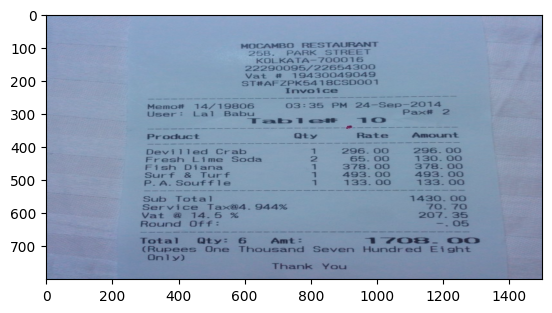

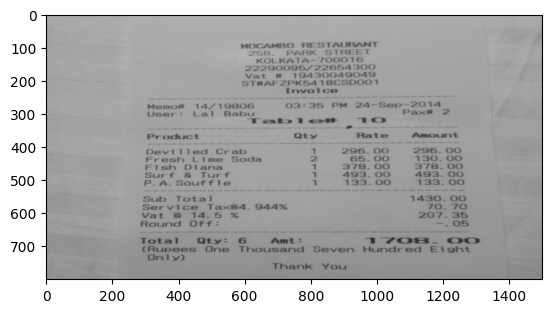

In [5]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()
plt.imshow(regen)
plt.show()




In [6]:
regen.shape

(800, 1500, 3)

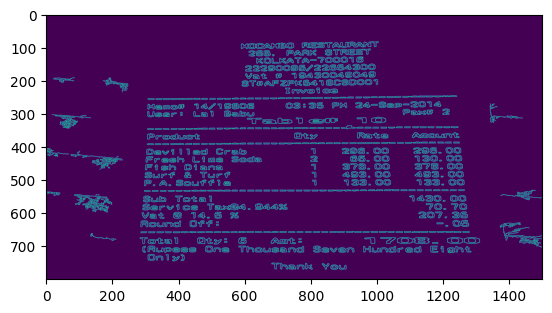

In [7]:
#Edge detections
edge= cv2.Canny(blurred,0,50)
orig_edge=edge.copy()
plt.imshow(orig_edge)
plt.show()


In [8]:
##Contours Extraction
contours,_=cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))
contours = sorted(contours,reverse=True, key= cv2.contourArea)

1720


In [9]:
##Select the best contour regionss
for c in contours:
    p= cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c, 0.01*p,True)
    if len(approx)==4:
        target =approx
        break
print(target.shape)        

(4, 1, 2)


In [10]:
#Reorder target contour
def reorder(h):
    h=h.reshape((4,2))
    print(h)
    
    hnew = np.zeros((4,2), dtype = np.float32)
    add= h.sum(axis=1)
    hnew[3]= h[np.argmax(add)]
    hnew[1]=h[np.argmax(add)]
    diff = np.diff(h,axis=1)
    hnew[0]=h[np.argmax(diff)]
    hnew[2]=h[np.argmax(diff)]
    return hnew
    

In [11]:
reorder = reorder(target)
print(reorder)

[[970 418]
 [970 421]
 [974 421]
 [974 418]]
[[970. 421.]
 [974. 421.]
 [970. 421.]
 [974. 421.]]


In [12]:
#Project to find screen
input_representation = reorder

output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [13]:
M = cv2.getPerspectiveTransform(input_representation,output_map)
ans = cv2.warpPerspective(orig,M,(800,800))

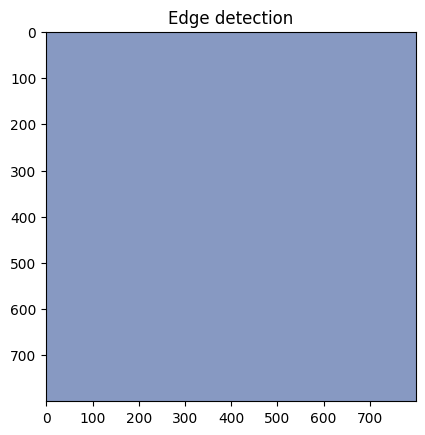

In [14]:
plt.imshow(ans)
plt.title("Edge detection")
plt.show()


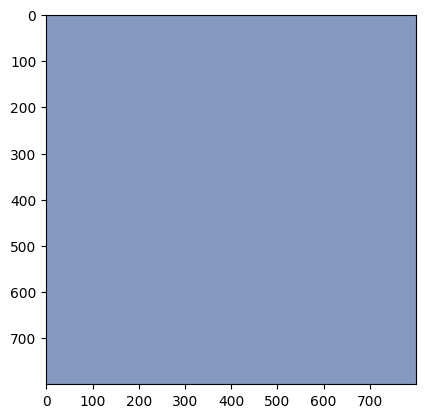

In [15]:
plt.imshow(ans)
plt.show()

In [2]:
res= cv2.cvtColor(ans,cv2.COLOR_BGR2GRAY)
b_res= cv2.GaussianBlur(res,(3,3),0)
plt.imshow(res,cmap="binary")
plt.show()
plt.imshow(b_res,cmap="binary")
plt.show()



NameError: name 'cv2' is not defined